# Computer Vision - P2

### **Carefully read the file `README.md` as well as the following instructions before start coding.**

## Delivery

Up to **1 point out of 10** will be penalized if the following requirements are not fulfilled:

- Implemented code should be commented.

- The questions introduced in the exercises must be answered.

- Comments need to be in **english**.

- The deliverable must be a file named **P2_Student1_Student2.zip** that includes:
    - The notebook P2_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.
    - All the images used in this notebook.

**Deadline (Campus Virtual): October 16th, 23:00 h** 

==============================================================================================
## Practicum 2: Filtering and edge detection

==============================================================================================

The main topics are:
1. Image smoothing and convolution (exercises 2.1, 2.2, 2.3 and 2.4)
2. Edge detection (exercises 2.5, 2.6 and 2.7)

In order to complete this practicum, the following concepts need to be understood: linear filters, histograms, convolutions, and edges.

The following chapters of the book "Computer Vision: Algorithms and Applications" by Richard Szeliski provide additional information:
* Chapter 3. Image processing: Point operators & linear filtering.
* Chapter 4. Feature detection and matching: Edges.

### 2.1 RGB histogram visualization

a) Read the image "face.png" and visualize the RGB image as well as each of its channels separately (R, G, and B).

In [1]:
from skimage import io
from skimage.color import rgb2gray
from skimage import img_as_float
from skimage import exposure

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

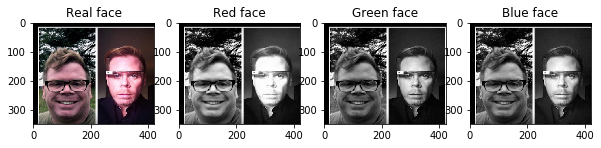

In [2]:
# -- Read the face image.
img= mpimg.imread('images/face.png')

# -- Select the channels RGB from the face image.
img_R = img[:, :, 0]
img_G = img[:, :, 1]
img_B = img[:, :, 2]
# -- Show the original image and her 3 channels (RGB).
f, axarr = plt.subplots(ncols=4, nrows=1,figsize=(10,10))
axarr[0].imshow(img, cmap="gray")
axarr[0].set_title('Real face')
axarr[1].imshow(img_R, cmap="gray")
axarr[1].set_title('Red face')
axarr[2].imshow(img_G, cmap="gray")
axarr[2].set_title('Green face')
axarr[3].imshow(img_B, cmap="gray")
axarr[3].set_title('Blue face')
plt.show()

b) Visualize the histogram of the image. What is the histogram representing for an image? 
The plotted histogram must accomplish these requirements (see image bellow as an example of histogram extraction):

    - Obtain the histogram with 8 and 32 bins. 

    - Visualize the histogram of each channel and the gray level image separately and compare them. Comment their differences.

Note: What type should be the image in order to compute the histogram? check using different bins for the histogram. 

Hint : the `exposure` module within the `skimage` library makes the histogram extraction easy!

Help: [matplotlib image tutorial](https://matplotlib.org/users/image_tutorial.html)

<img src='images_for_notebook/ex21a.png'>

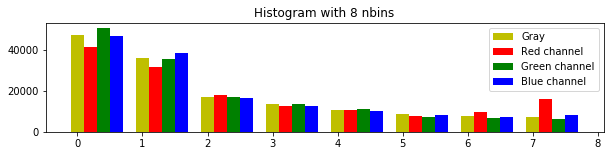

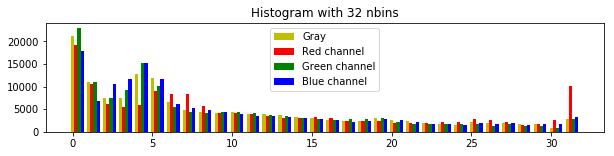

In [3]:
# -- Read the face image.
img = mpimg.imread("images/face.png")

# -- Select the channels RGB and gray from the face image
img_Gray = rgb2gray(img)
img_R = img_as_float(img[:,:,0])
img_G = img_as_float(img[:,:,1])
img_B = img_as_float(img[:,:,2])

# -- Method make_a_histogram:
def make_a_histogram(nbins):
    
    # -- Take the histogram of the images with the number of bins specified.
    histogram_R, bins_R = exposure.histogram(img_R, nbins=nbins)
    histogram_G, bins_G = exposure.histogram(img_G, nbins=nbins)
    histogram_B, bins_B = exposure.histogram(img_B, nbins=nbins)
    histogram_Gray, bins_Gray = exposure.histogram(img_Gray, nbins=nbins)
    
    # -- Configured the histogram graphics, the size, numbers of bins and the width of the bins.
    fig, ax = plt.subplots(figsize=(10,2))
    ind = np.arange(nbins)
    width=0.2
    val0 = ind + width
    val1 = ind + 2 * width
    val2 = ind + 3 * width
    
    # -- Configured all of the channels, the position of the bin, the histogram, the width and the color.
    rects_Gray = ax.bar(ind, histogram_Gray, width, color='y')
    rects_R = ax.bar(val0, histogram_R, width, color='r')
    rects_G = ax.bar(val1, histogram_G, width, color='g')
    rects_B = ax.bar(val2, histogram_B, width, color='b')
    
    # -- Configured the legend and the tittle of the histogram.
    ax.legend((rects_Gray[0], rects_R[0], rects_G[0], rects_B[0]),('Gray', 'Red channel', 'Green channel', 'Blue channel'))
    ax.set_title('Histogram with ' + str(nbins) + ' nbins')
    
    # -- Show the configured histogram.
    plt.show()

# -- Create the histogram with 8 and 32 bins.
make_a_histogram(8)
make_a_histogram(32)

### 2.2 Grayscale and RGB images filtering (convolutions)

a) Read the image `face.png` and apply each of the following steps:

1. Convert it to grayscale with the function `color.rgb2gray()` of the package `skimage`.
2. Convolve it with a horizontal mask `mask_h1d=[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]` using the function `ndimage.convolve()` of the package `scipy`.
3. Convolve the original image (1) with a transposed version of the mask in (2).
4. Convolve the original image (1) with a uniform `two-dimensional` mask of dimensions 15x15 with all values set to 1.

**Visualize the output of each step (1 to 4) next to each other. Write short titles on each figure to make them understandable.**

#### Questions

- Observe and comment how the ***type*** and the ***range of values (max & min)*** changed when different operations have been applied on the image. 

- Is the type of the mask important for the convolution? What effect does each of the masks produce on the original image? Compare the results.

Note: Remember that `matplotlib.pyplot` automatically rescales the values of the image before displaying them. Visualize with and without values range rescaling.

Note: The command `convolve` performs a multidimensional convolution! A vector should be represented as: [[1,...1]].

Note: Remember that before applying the `convolve` function the mask must be normalized (i.e. all values in the mask must sum 1).

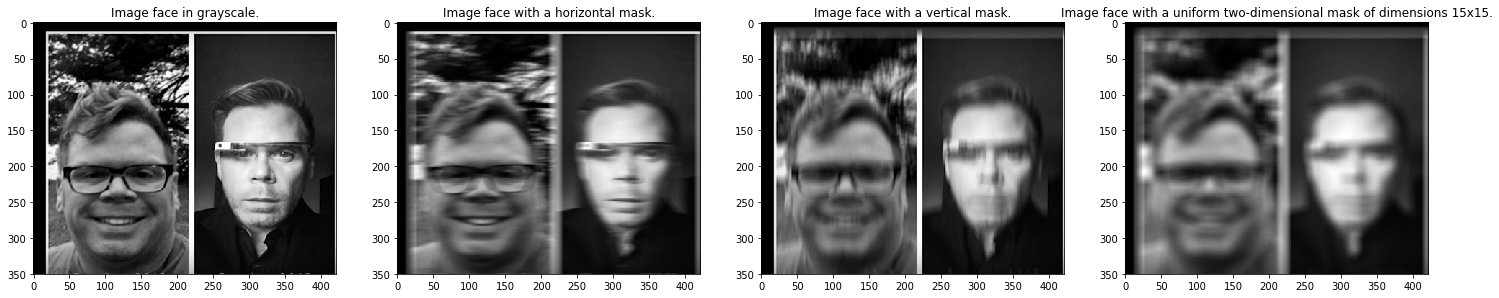

In [30]:
from scipy import ndimage

# -- Read the face image and convert it to grayscale. (1)
img= mpimg.imread('images/face.png')
img_gray = rgb2gray(img)

# -- Convolved with a horizontal mask mask_h1d. (2)
mask_h1d = np.ones([1, 15], dtype="float64")
img_h_convolved = ndimage.convolve(img_gray, mask_h1d)

# -- Convolved with a transposed version of the mask mask_h1d. (3)
mask_v1d = np.transpose(mask_h1d)
img_v_convolved = ndimage.convolve(img_gray, mask_v1d)

# -- Convolved with a 15x15 mask. (4)
mask_h1d = np.ones([15, 15], dtype="float64")
img_15_convolved = ndimage.convolve(img_gray, mask_h1d)

# -- Show the gray imag and her 3 convolved versions (horizontal mask, transpossed mask and 15x15 mask).
f, axarr = plt.subplots(ncols=4, nrows=1,figsize=(25,15))
axarr[0].imshow(img_gray, cmap="gray")
axarr[0].set_title('Image face in grayscale.')
axarr[1].imshow(img_h_convolved, cmap="gray")
axarr[1].set_title('Image face with a horizontal mask.')
axarr[2].imshow(img_v_convolved, cmap="gray")
axarr[2].set_title('Image face with a vertical mask.')
axarr[3].imshow(img_15_convolved, cmap="gray")
axarr[3].set_title('Image face with a uniform two-dimensional mask of dimensions 15x15.')
plt.show()

In [26]:
# Question 1 --> Si modificamos los maximos y minimos de la mascara podemos ajustar el nivel de suavizado que se le aplica 
# a la imagen.

# Question 2 --> Si que es important el tipus de mascara, ja que depenen de com sigui aquesta la imatge es transformara d'una
# o altra forma, la imagen suaviza sus contornos en las dimensiones de la mascara, como mas grande es la mascara mas se suaviza.

b) Given a color image (im), what is the difference between ***1*** and ***2*** ?
   
*** 1. ***

im_2=np.array(im, dtype='float')


*** 2. ***

im_2=np.array(im)


im_2=img_as_float(im_2)

In [64]:
# 1 --> The first creates a matrix with float data type.

# 2 --> The second one creates a matrix and then with the function img_as_float () it transforms it into float data type.

c) Can we convolve a color (RGB) image? In order to convolve an RGB each of the channels must be convolved separately.

Implement a function that applies a 3-channel filter and visualize its result on `face.png` with a 15x15 uniform mask.

Which is the result obtained when applying a single-channel filter channel by channel separately?

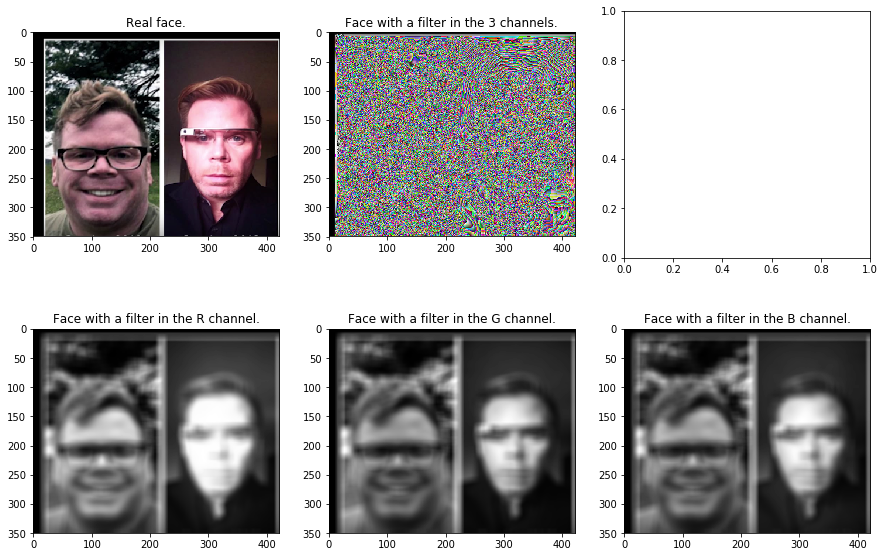

In [32]:
from scipy import ndimage

# -- Read the face image. (1)
img = mpimg.imread('images/face.png')
img_2 = mpimg.imread('images/face.png')

# -- Convolved the 3 channels (RGB) with a horizontal mask mask_h1d. (2)
mask_15 = np.ones([15, 15], dtype="float64")
img_2[:,:,0] = ndimage.convolve(img[:,:,0], mask_15)
img_2[:,:,1] = ndimage.convolve(img[:,:,1], mask_15)
img_2[:,:,2] = ndimage.convolve(img[:,:,2], mask_15)

# -- Show the original image, the image with the 3 channels convolved and the 3 convolved channels (RGB). (2)
f, axarr = plt.subplots(ncols=3, nrows=2,figsize=(15,10))
axarr[0][0].imshow(img, cmap="gray")
axarr[0][0].set_title('Real face.')
axarr[1][0].imshow(img_2[:,:,0], cmap="gray")
axarr[1][0].set_title('Face with a filter in the R channel.')
axarr[1][1].imshow(img_2[:,:,1], cmap="gray")
axarr[1][1].set_title('Face with a filter in the G channel.')
axarr[1][2].imshow(img_2[:,:,2], cmap="gray")
axarr[1][2].set_title('Face with a filter in the B channel.')
axarr[0][1].imshow(img_2, cmap="gray")
axarr[0][1].set_title('Face with a filter in the 3 channels.')
plt.show()

In [ ]:
# Question --> Se transforma cada canal de forma inividual obteniendo imagenes convertidas por la imagen, 
#  unir estas imagenes se obtiene una imagen fruto de la union de los tres canales. !!! NO ESTIC SEGUR !!!

### 2.3 Effect of image scale on convolutions

a) Resize an image and observe the variations in the histograms.

1. Reduce it 10 times
2. Augment it 10 times. 
3. Observe if the histogram (i.e. nbins = 32) of the new images changed, and comment what happens and why.

Note: Use the command `resize` to change the size of the images.


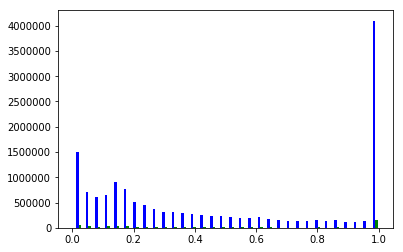

In [49]:
# -- Read the face image, convolved to float type and take her dimensions.
img = mpimg.imread('images/face.png')
img_2 = np.array(img, dtype='float')
filas = len(img_2)
columnas = len(img_2[0])

# -- Reduced 10 times.
img_peque = np.resize(img, (int(filas/10), int(columnas/10)))

# -- Augmented 10 times.
img_grande = np.resize(img, (filas*10, columnas*10))

# -- Show the histogram setting the color, number of bins and the range.
plt.hist([img_peque.ravel(), img_grande.ravel(), img.ravel()],color = ["red", "blue","green"], bins=32, range=(0.0, 1.0))
plt.show()

In [ ]:
# Question --> Las barras azules son mas grandes que las verdes (imagen original) ya que pertenecen a la imagen grande,
# las columnas rojas pertenecen a la imagen pequeña, el tamaño de las columnas esta directamente relacionada con el tamaño
# de las imagenes??

b) Apply a convolution (15x15 uniform mask) on the resized images and compare the results.

1. Convolve the original image.
2. Convolve the image reduced 10 times.
3. Convolve the image augmented 10 times.

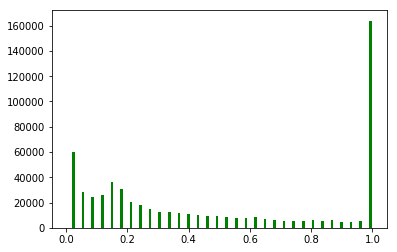

In [51]:
# -- Read the face image, convolved to float type and take her dimensions.
img = mpimg.imread('images/face.png')
img_2 = np.array(img, dtype='float')
filas = len(img_2)
columnas = len(img_2[0])

# -- Convolved with a 15x15 mask and reduced 10 times.
mask_15 = np.ones([15, 15], dtype="float64")
img_peque = np.resize(img, (int(filas/10), int(columnas/10)))
img_peque = ndimage.convolve(img_peque, mask_15)

# -- Convolved with a 15x15 mask and augmented 10 times.
img_grande = np.resize(img, (filas*10, columnas*10))
img_grande = ndimage.convolve(img_grande, mask_15)

# -- Show the histogram setting the color, number of bins and the range.
plt.hist([img_peque.ravel(), img_grande.ravel(),img.ravel()],color = ["red", "blue","green"], bins=32, range=(0.0, 1.0))
plt.show()

In [ ]:
# Question --> El tamaño de las imagenes creadas es nulo??

### 2.4 Image processing with weighting and non-linear filters

a) Generate the following kernels and apply them to the `face.png`:

1. Gaussian kernel with sigma = 1
2. Gaussian kernel with a different sigma value. Which is the most adequate value for keeping the main objects and structures of the image?
3. Median filter.

Comment the effect of using different kinds of filters on the original image.

Hint: search for the skimage.filters function for creating the different filters.

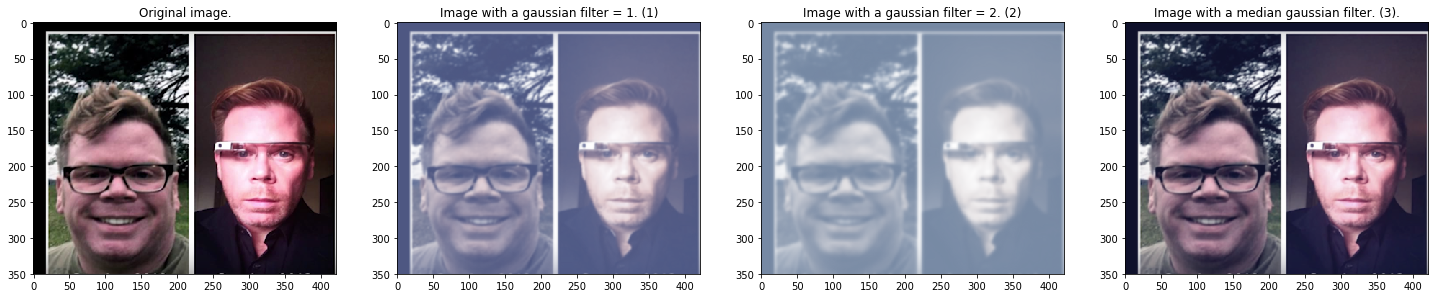

In [17]:
from skimage.filters import gaussian
# -- Method gaussian_kernel:
def gaussian_kernel(path):
    # -- Read the face image.
    img = mpimg.imread(path)

    # -- 
    img_gaussian1 = gaussian(img, sigma = 1)
    img_gaussian2 = gaussian(img, sigma = 2)
    img_gaussian3 = gaussian(img, sigma = 3)
    img_gaussian_medio = gaussian(img, sigma = 0.5)


    # -- Show the original image and other 4 image with a differents gaussian filters.
    f, axarr = plt.subplots(ncols=4, nrows=1,figsize=(25,15))
    axarr[0].imshow(img, cmap="gray")
    axarr[0].set_title('Original image.')
    axarr[1].imshow(img_gaussian1, cmap="gray")
    axarr[1].set_title('Image with a gaussian filter = 1. (1)')
    axarr[2].imshow(img_gaussian2, cmap="gray")
    axarr[2].set_title('Image with a gaussian filter = 2. (2)')
    axarr[3].imshow(img_gaussian3, cmap="gray")
    axarr[3].set_title('Image with a gaussian filter = 3. (2)')
    axarr[3].imshow(img_gaussian_medio, cmap="gray")
    axarr[3].set_title('Image with a median gaussian filter. (3).')
    plt.show()

# -- Call the method gaussian_kernel and pass the face.png parameter.
gaussian_kernel("images/face.png")

In [ ]:
# Question --> No se que vol que es comentir.

b) **(Optional)** Apply the smoothing on some other images and present their results.

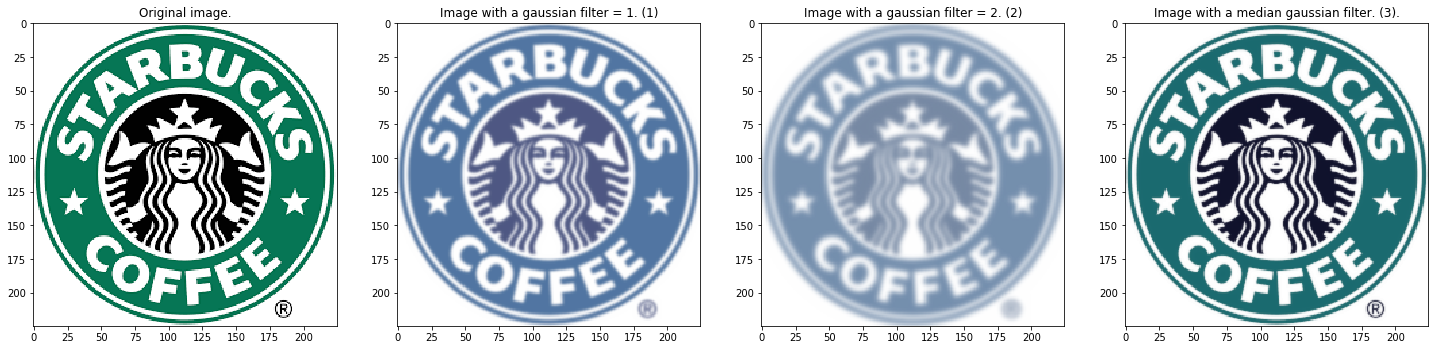

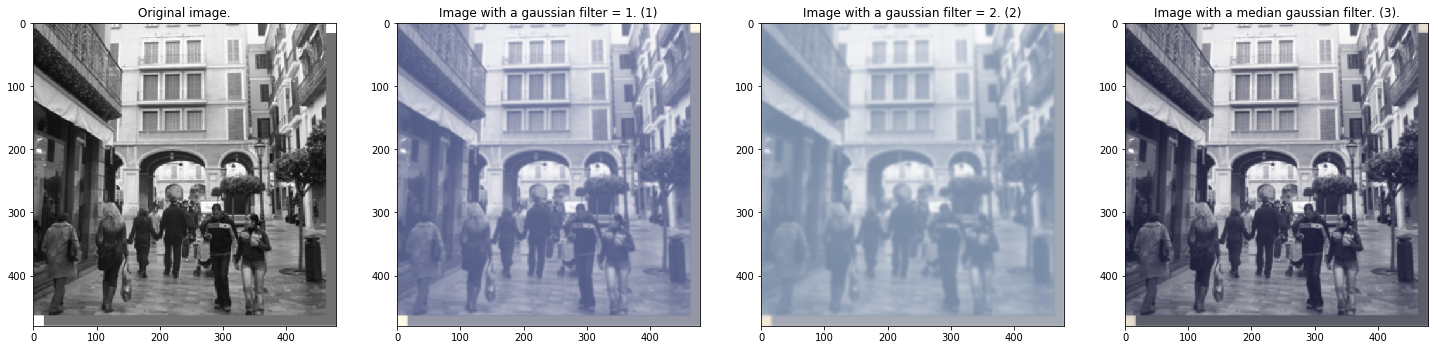

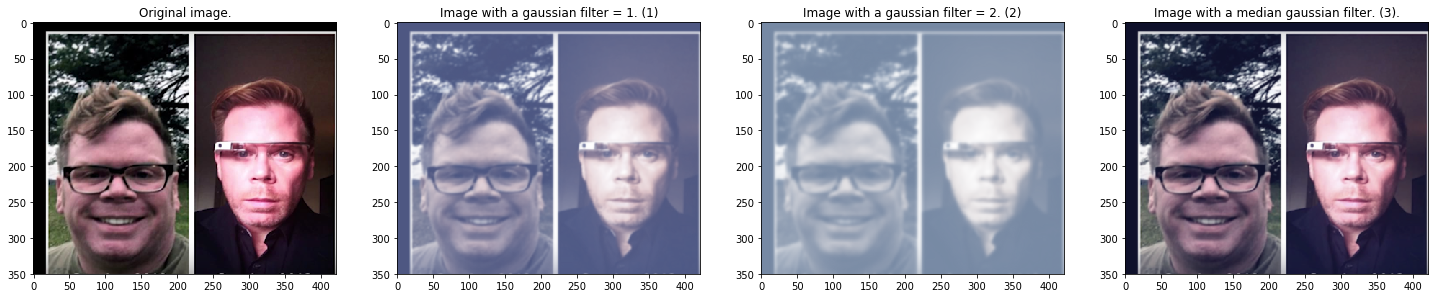

In [24]:
# -- Call the method gaussian_kernel and pass the logo.png parameter.
gaussian_kernel("images/logo.png")

# -- Call the method gaussian_kernel and pass the street.png parameter.
gaussian_kernel("images/street.png")

# -- Call the method gaussian_kernel and pass the face.png parameter.
gaussian_kernel("images/face.png")

### 2.5 Determine the optimal contour 

a) Load the 'logo.png' image and visualize its contours.	

Apply the different contour extraction tecniques introduced during the theory session and change any parameter if necessary for detecting the edges of the image:

1. Roberts.
2. Prewitt
3. Sobel
4. Canny

Use subplot and title to visualize the results.

#### **Questions**

- Which is the best countour detection technique? 

- Which are the optimal parameters for this image? 

- Is it necessary to normalize the mask as we do in the filtering applied for the smoothing? 

**Hint**: use `skimage.feature.canny` for applying the canny filter and `skimage.filters` for the rest.

**(Optional)** Superimpose the contours over the image.

b)	Repeat the experiment with other images, you can use the ones included in the folder **images**. Comment if some parameter needs to be changed for the different images.

#### **Questions**

- Are the contours improved if the image is previously smoothed ? 
- Which are the limitations of the different images contour extraction?

c) Optional: How many different ways can the Sobel detector be applied? Apply it (in all possible ways), and visualize and compare the obtained results.


### 2.6 Applying smoothing in order to obtain hybrid images

a) Given `Einstein.jpg` and `monroe.jpg` images:

1. Plot both images.
2. Apply a low-pass filter to both of them and plot them.
3. Apply a high-pass filter to both of them and plot them.

By applying smoothing over an image I, we apply a `low-pass` filter. The resulting image can be called L(I). If we substract the filtered one from the original image, we obtain its high frequencies, that we can call H(I), i.e. we apply a `high-pass` filter. 

***H(I) = I - L(I)***

Hint: In order to highlight the effect, in the L(I1) image you should define a lower sigma, while for the H(I1) you should use a higher one. 

b) Create hybrid images and visualize them. A hybrid image is obtained by combining the low and high frequencies of the image, i.e. combining the results obtained by the `low-pass` and `high-pass` filters.

Hybrid (I1, I2) = L(I1) + H(I2)

1. Analyze which is the best way of showing it if our aim is to see Marylin Monroe. 
2. Additionally, rescale the image to a different size and comment the results. 

Present the different visualizations of the experiment performed.

c) **(Optional)**

1. Apply fspecial('gaussian,hsize,sigma') with the formula hsize=4*sigma+1. What does hsize mean?
2. Compute hybrid images from other images. Apply it over color images.

### 2.7 Anonimization of videos

One of the important problems in Computer Vision as a science that manages data (images and videos) is the anonimization of persons appearing in them. Given the collection of images in the folder collectionbigbang, smooth the images in order to make unrecognizible the faces of the persons. Display sequentially the original and the anonimized images.

Help: 

- In order to read all images from a sequence, check the type [ImageCollection](http://scikit-image.org/docs/0.7.0/api/skimage.io.collection.html).

- In order to animate a sequence of images, you can use the animation library of matplotlib (in particular, [FuncAnimation](https://matplotlib.org/api/animation_api.html). 

Note that the animation library does not work with matplotlib inline. You should use the nbagg plugin to visualize the sequence of images. To this purpose, write before animation the following line:
% matplotlib nbagg

Note: you only need to run and understand the following code, you do not need to implement anything.

Info about the animation:
Num Frames:200
Images height:180
Images width:320


/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


The variable ic_small contains all rescaled images. Its shape is: (180, 320, 3, 200)


<IPython.core.display.Javascript object>


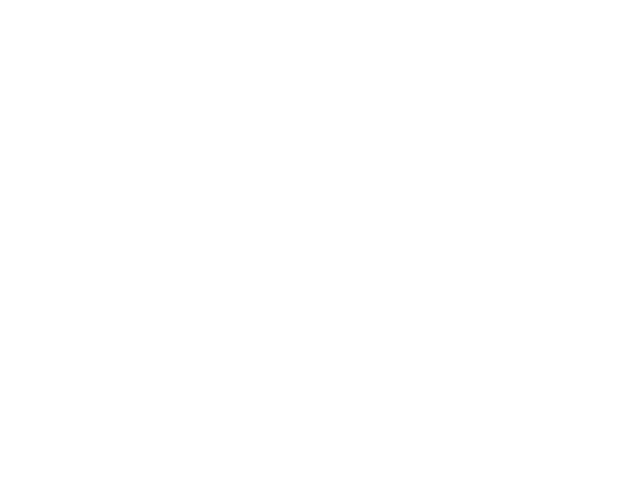

In [47]:
"""Solution, showing one video per annimation"""

from skimage import io
import numpy as np
from skimage import transform
from matplotlib import pyplot as plt
import matplotlib.animation as animation

ic = io.ImageCollection('./images/bigbangcollection/*.png')

# Rescale to half of their size
scale=0.5
frames = len(ic)
height=np.int((ic[0].shape[0])*scale)
width=np.int((ic[0].shape[1])*scale)

print('Info about the animation:')
print('Num Frames:' + str(frames))
print('Images height:' + str(height))
print('Images width:' + str(width))

# create variable with dimensions of images by the number of frames
ic_small=np.ndarray(shape=(height,width,3,frames))

# combine them in ic_small variable
for i in range(frames):
        ic_small[:,:,:,i]=transform.rescale(ic[i],scale)
        
print('The variable ic_small contains all rescaled images. Its shape is: ' + str(ic_small.shape))


%matplotlib nbagg

def updatefig1(i): 
    #im.set_array(ic_small[:,:,:,i]) #showing the small image
    im.set_array(conv_color(ic_small[:,:,:,i], mask_2d))   
    plt.draw()
    return im,

fig = plt.figure()
im = plt.imshow(ic_small[:,:,:,0])
ani = animation.FuncAnimation(fig, updatefig1, interval=2, blit=True, frames=len(ic), repeat= False)
plt.show()


Info about the animation:
Num Frames:200
Images height:180
Images width:320


/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


The variable ic_small contains all rescaled images. Its shape is: (180, 320, 3, 200)


Traceback (most recent call last):
  File "/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 389, in process
    proxy(*args, **kwargs)
  File "/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 227, in __call__
    return mtd(*args, **kwargs)
  File "/anaconda3/lib/python3.6/site-packages/matplotlib/animation.py", line 1560, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


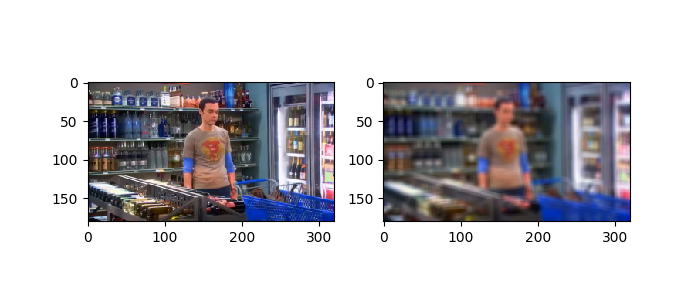

In [48]:
"""Solution, showing 2 videos per annimation : original + blurred"""

from skimage import io
import numpy as np
from skimage import transform
from matplotlib import pyplot as plt
import matplotlib.animation as animation

ic = io.ImageCollection('./images/bigbangcollection/*.png')

# Rescale to half of their size
scale=0.5
frames = len(ic)
height=np.int((ic[0].shape[0])*scale)
width=np.int((ic[0].shape[1])*scale)

print('Info about the animation:')
print('Num Frames:' + str(frames))
print('Images height:' + str(height))
print('Images width:' + str(width))

# create variable with dimensions of images by the number of frames
ic_small=np.ndarray(shape=(height,width,3,frames))

# combine them in ic_small variable
for i in range(frames):
        ic_small[:,:,:,i]=transform.rescale(ic[i],scale)
        
print('The variable ic_small contains all rescaled images. Its shape is: ' + str(ic_small.shape))

# 
# the framesD matrix is created by 0s
#
%matplotlib nbagg
mask_2d=np.ones((7,7)) # 7 by 7 mask with all ones
mask_2d/=mask_2d.sum() 

def updfig2(i):
    imm1.set_array(ic_small[:,:,:,i]) # we plot the original image just with the resize
    imm2.set_array(conv_color(ic_small[:,:,:,i], mask_2d)) # we plot the convolved image with the mask_2d
    plt.draw()
    return imm1,imm2,

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(7,3))
img0=ic_small[:,:,:,0]
imm1=ax1.imshow(img0)
imm2=ax2.imshow(img0)
plt.show()
ani = animation.FuncAnimation(fig, updfig2, interval=2, 
                              blit=True, repeat=False, frames=len(ic))
plt.show()